In [1]:
import numpy as np                               
import pandas as pd                               
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Find the shape of the customers
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 2240 rows and 29 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
def missing_values(df):
    total = df.isna().sum()
    percentage = (df.isna().mean() * 100)
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage']).sort_values(by='Percentage',
                                                                                            ascending = False)
  

In [6]:
results = missing_values(df)
print(results)

                     Total  Percentage
Income                  24    1.071429
ID                       0    0.000000
NumDealsPurchases        0    0.000000
Z_Revenue                0    0.000000
Z_CostContact            0    0.000000
Complain                 0    0.000000
AcceptedCmp2             0    0.000000
AcceptedCmp1             0    0.000000
AcceptedCmp5             0    0.000000
AcceptedCmp4             0    0.000000
AcceptedCmp3             0    0.000000
NumWebVisitsMonth        0    0.000000
NumStorePurchases        0    0.000000
NumCatalogPurchases      0    0.000000
NumWebPurchases          0    0.000000
MntGoldProds             0    0.000000
Year_Birth               0    0.000000
MntSweetProducts         0    0.000000
MntFishProducts          0    0.000000
MntMeatProducts          0    0.000000
MntFruits                0    0.000000
MntWines                 0    0.000000
Recency                  0    0.000000
Dt_Customer              0    0.000000
Teenhome                 

In [7]:

# Imputing missing values in 'Income' with median
imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])

In [8]:
results = missing_values(df)
print(results)

                     Total  Percentage
ID                       0         0.0
NumDealsPurchases        0         0.0
Z_Revenue                0         0.0
Z_CostContact            0         0.0
Complain                 0         0.0
AcceptedCmp2             0         0.0
AcceptedCmp1             0         0.0
AcceptedCmp5             0         0.0
AcceptedCmp4             0         0.0
AcceptedCmp3             0         0.0
NumWebVisitsMonth        0         0.0
NumStorePurchases        0         0.0
NumCatalogPurchases      0         0.0
NumWebPurchases          0         0.0
MntGoldProds             0         0.0
Year_Birth               0         0.0
MntSweetProducts         0         0.0
MntFishProducts          0         0.0
MntMeatProducts          0         0.0
MntFruits                0         0.0
MntWines                 0         0.0
Recency                  0         0.0
Dt_Customer              0         0.0
Teenhome                 0         0.0
Kidhome                  

In [9]:
#check for duplicates

df.duplicated().sum() # There are no duplicates

0

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Check in which campaign most of the customers accepted the offer- This will give marketing team idea, the limit they need to send out emails to customers for the promotons

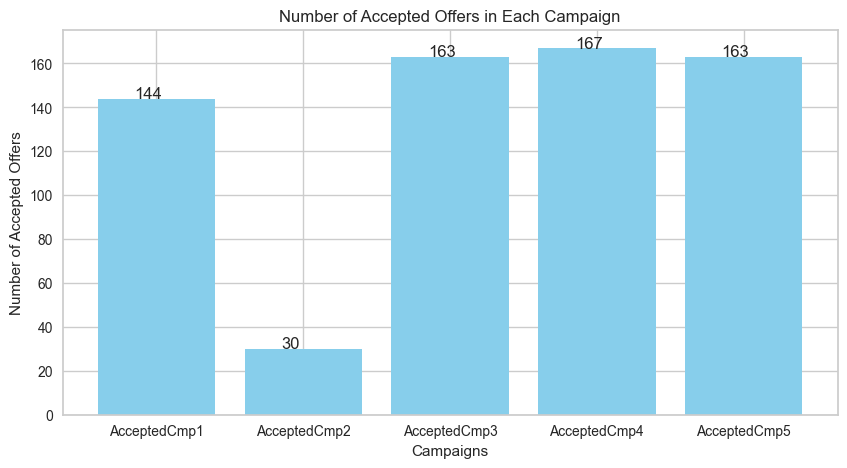

In [11]:
# Calculate the sum of accepted offers for each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
accepted_counts = [df[campaign].sum() for campaign in campaigns]

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 5))
bars = plt.bar(campaigns, accepted_counts, color='skyblue')
plt.xlabel('Campaigns')
plt.ylabel('Number of Accepted Offers')
plt.title('Number of Accepted Offers in Each Campaign')


# Annotate each bar with its count
for bar, count in zip(bars, accepted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), fontsize=12)

plt.show()

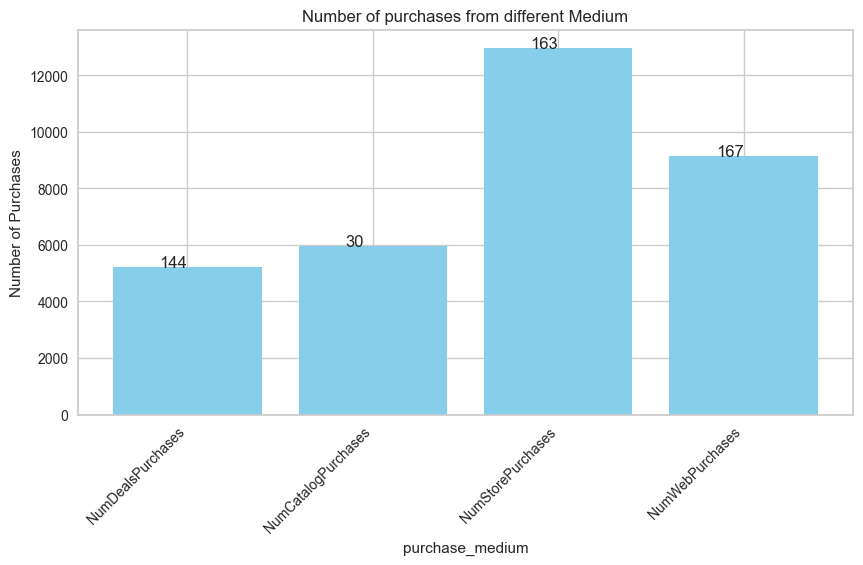

In [12]:
#Analysing the purchases from different mediums and webvisits

purchase_mediums=['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases']

purchase_counts=[df[purchase_medium].sum() for purchase_medium in purchase_mediums]

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 5))
bars = plt.bar(purchase_mediums, purchase_counts, color='skyblue')
plt.xlabel('purchase_medium')
plt.ylabel('Number of Purchases')
plt.title('Number of purchases from different Medium')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')


# Annotate each bar with its count
for bar, count in zip(bars, accepted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(count), fontsize=12)

plt.show()


In [13]:
# Feature Engineering
#Age Column


current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth'].astype(int)

In [14]:
# Combining Kidhome and Teenhome to new column children and different categories spedings to new column total spent

df['Children']=df['Kidhome'] + df['Teenhome']

df['total_spent']= df['MntSweetProducts'] + df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntWines'] + df['MntGoldProds']
df['num_of_purchases']=df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] 
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']


In [15]:
for i in df.columns:
    unique=df[i].nunique()
    print(f'Total Unique value in {i}:', unique )

Total Unique value in ID: 2240
Total Unique value in Year_Birth: 59
Total Unique value in Education: 5
Total Unique value in Marital_Status: 8
Total Unique value in Income: 1975
Total Unique value in Kidhome: 3
Total Unique value in Teenhome: 3
Total Unique value in Dt_Customer: 663
Total Unique value in Recency: 100
Total Unique value in MntWines: 776
Total Unique value in MntFruits: 158
Total Unique value in MntMeatProducts: 558
Total Unique value in MntFishProducts: 182
Total Unique value in MntSweetProducts: 177
Total Unique value in MntGoldProds: 213
Total Unique value in NumDealsPurchases: 15
Total Unique value in NumWebPurchases: 15
Total Unique value in NumCatalogPurchases: 14
Total Unique value in NumStorePurchases: 14
Total Unique value in NumWebVisitsMonth: 16
Total Unique value in AcceptedCmp3: 2
Total Unique value in AcceptedCmp4: 2
Total Unique value in AcceptedCmp5: 2
Total Unique value in AcceptedCmp1: 2
Total Unique value in AcceptedCmp2: 2
Total Unique value in Compla

In [16]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [17]:
df['Marital_Status'].replace(['Married','Together','Single','Divorced','Widow','Alone','Absurd','YOLO'],
                             ['Together','Together','Alone','Alone','Alone','Alone','Alone','Alone'],inplace=True)

In [18]:
df['Marital_Status'].value_counts()

Together    1444
Alone        796
Name: Marital_Status, dtype: int64

In [19]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [20]:
df['Education'].replace(['Basic','2n Cycle','Graduation','Master','PhD'],
                        ['UnderGraduate','UnderGraduate','Graduate','PostGraduate','PostGraduate'],inplace=True)

In [21]:
df['Education'].value_counts()

Graduate         1127
PostGraduate      856
UnderGraduate     257
Name: Education, dtype: int64

In [22]:
# Create a new column 'Family_Members' without lambda function
df['Family_Members'] = df['Children'] + (df['Marital_Status'] == 'Together') * 2 + (df['Marital_Status'] == 'Alone')




In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,total_spent,num_of_purchases,AcceptedCmp,Family_Members
0,5524,1957,Graduate,Alone,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,66,0,1617,25,0,1
1,2174,1954,Graduate,Alone,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,69,2,27,6,0,3
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,58,0,776,21,0,2
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,39,1,53,8,0,3
4,5324,1981,PostGraduate,Together,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,42,1,422,19,0,3


In [24]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['Joined_year']=pd.to_datetime(df['Dt_Customer']).dt.year
df['Joined_month']=pd.to_datetime(df['Dt_Customer']).dt.strftime('%B')



In [25]:
# Encoding categorical variables and converting 'Dt_Customer' to a numerical feature

# Create a reference date for 'Dt_Customer' (we can use the latest date in the dataset)
reference_date = df['Dt_Customer'].max() + pd.Timedelta(days=1)
# Convert 'Dt_Customer' to the number of days since the reference date
df['Days_Since_Enrollment'] = (reference_date - df['Dt_Customer']).dt.days



In [26]:
del_col = ["ID","Dt_Customer","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5",
           "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds","Z_CostContact","Z_Revenue"]
df=df.drop(columns=del_col,axis=1)

In [27]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,total_spent,num_of_purchases,AcceptedCmp,Family_Members,Joined_year,Joined_month,Days_Since_Enrollment
0,1957,Graduate,Alone,58138.0,58,7,0,1,66,0,1617,25,0,1,2012,April,972
1,1954,Graduate,Alone,46344.0,38,5,0,0,69,2,27,6,0,3,2014,August,126
2,1965,Graduate,Together,71613.0,26,4,0,0,58,0,776,21,0,2,2013,August,473
3,1984,Graduate,Together,26646.0,26,6,0,0,39,1,53,8,0,3,2014,October,66
4,1981,PostGraduate,Together,58293.0,94,5,0,0,42,1,422,19,0,3,2014,January,322


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
NumWebVisitsMonth,2240.0,5.316518,2.426645,0.0,3.00,6.0,7.00,20.0
Complain,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0
Response,2240.0,0.149107,0.356274,0.0,0.00,0.0,0.00,1.0
Age,2240.0,54.194196,11.984069,27.0,46.00,53.0,64.00,130.0
Children,2240.0,0.950446,0.751803,0.0,0.00,1.0,1.00,3.0
total_spent,2240.0,605.798214,602.249288,5.0,68.75,396.0,1045.50,2525.0
num_of_purchases,2240.0,14.862054,7.677173,0.0,8.00,15.0,21.00,44.0


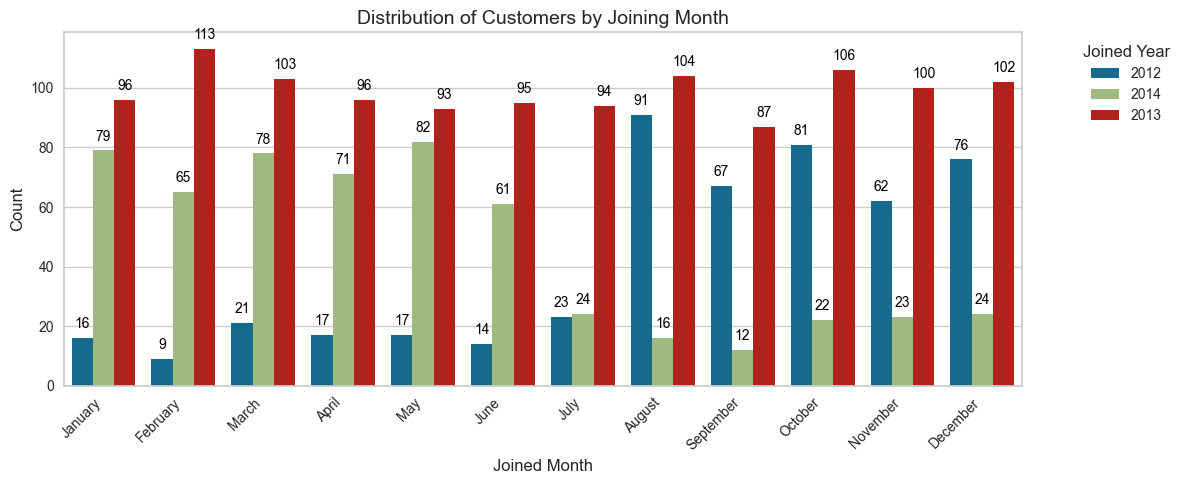

In [29]:

# Convert 'Joined_year' to string for proper categorical plotting
df['Joined_year'] = df['Joined_year'].astype(str)

# Set custom order for months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create the plot
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Joined_month', order=custom_order, hue='Joined_year')

# Adjusting legend
plt.legend(title='Joined Year', bbox_to_anchor=(1.05, 1), loc='upper left')



# Add labels and a title
plt.xlabel('Joined Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Customers by Joining Month', fontsize=14)

# Rotate x-axis labels and annotate bars
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with a non-zero height
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Ensure proper layout and show the plot
plt.tight_layout()
plt.show()


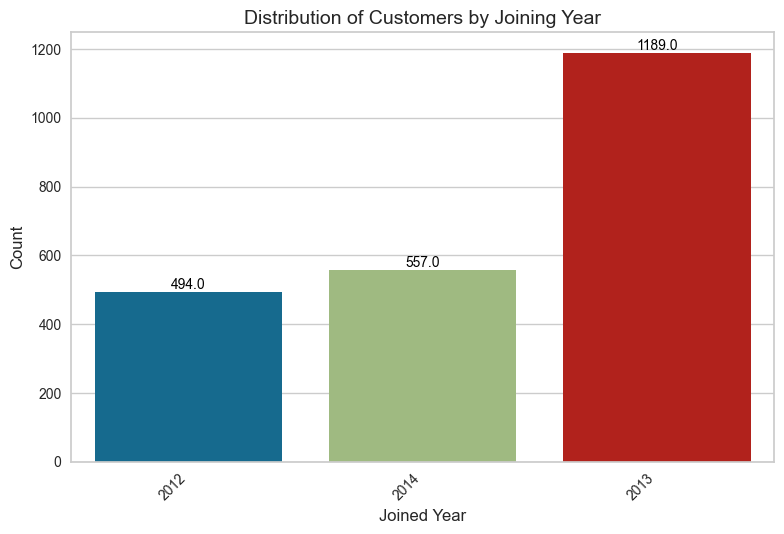

In [30]:
#Univariate Analysis

sns.countplot(data=df, x='Joined_year')

# Add labels and a title
plt.xlabel('Joined Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Customers by Joining Year', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the count above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Ensure proper layout
plt.tight_layout()

# Show the plot
plt.show()

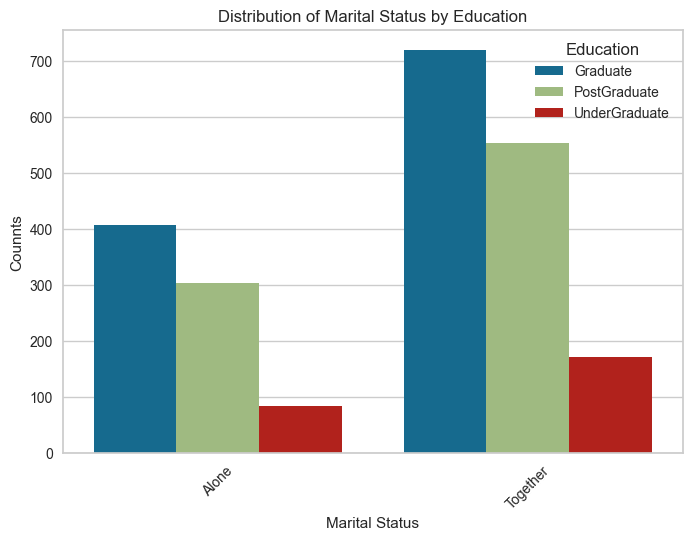

In [31]:
sns.countplot(df, x='Marital_Status', hue='Education')
plt.xlabel('Marital Status')
plt.ylabel('Counnts')
plt.title('Distribution of Marital Status by Education')
plt.xticks(rotation=45)
plt.legend(title='Education', loc='upper right')
plt.show()

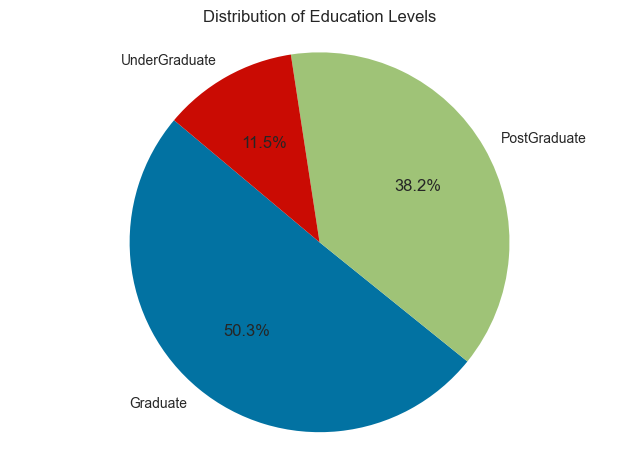

In [32]:
education_count= df['Education'].value_counts()
plt.pie(education_count, labels=education_count.index,autopct='%1.1f%%', startangle=140 )
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Distribution of Education Levels')
plt.show()

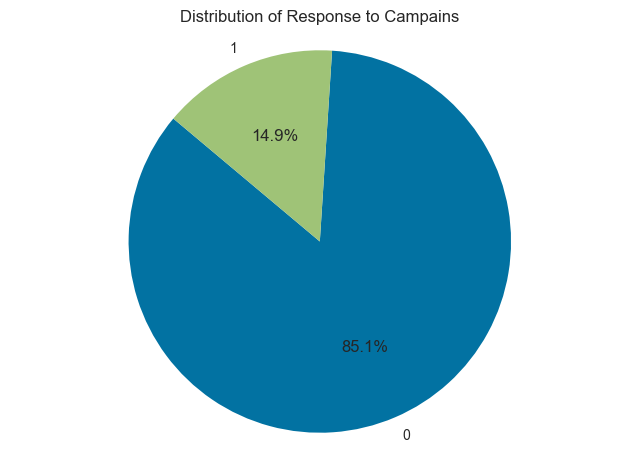

In [33]:
response_count=df['Response'].value_counts()
plt.pie(response_count, labels=response_count.index, autopct='%1.1f%%', startangle=140 )
plt.axis('equal') 
plt.title('Distribution of Response to Campains')
plt.show()

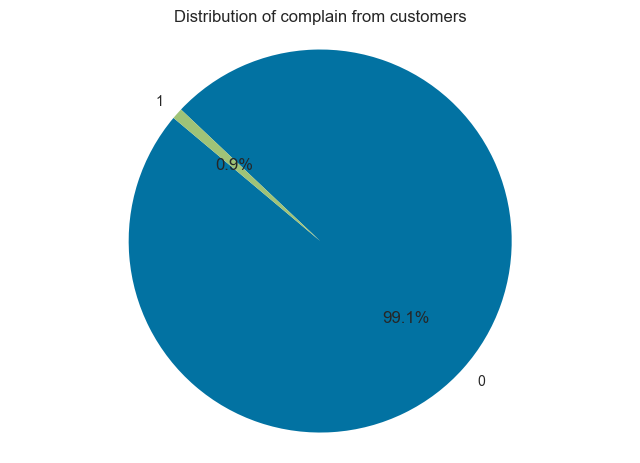

In [34]:
response_count=df['Complain'].value_counts()
plt.pie(response_count, labels=response_count.index, autopct='%1.1f%%', startangle=140 )
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Distribution of complain from customers')
plt.show()

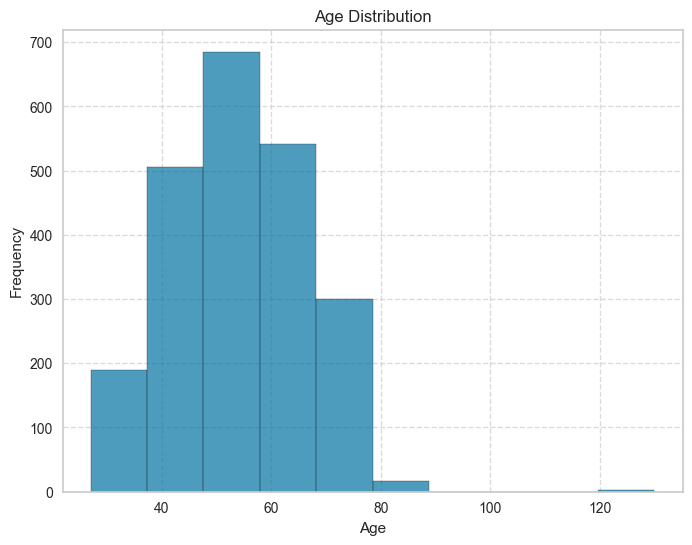

In [35]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



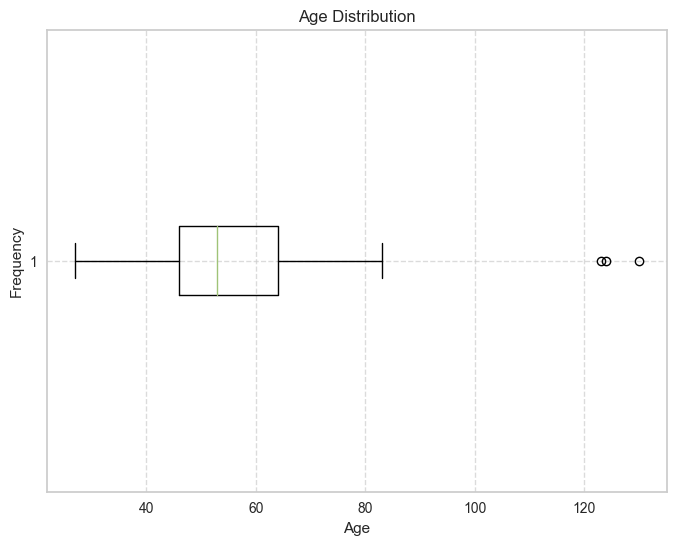

In [36]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.boxplot(df["Age"], vert=False)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

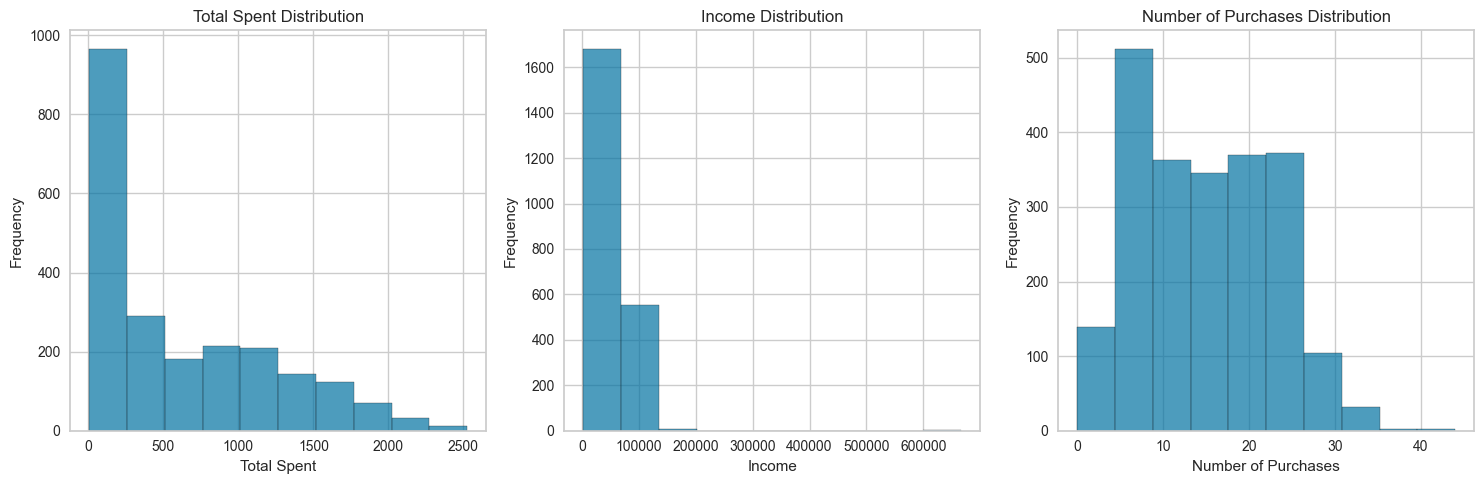

In [37]:


# Create separate histograms for 'Total_Spent,' 'Income,' and 'Num_of_Purchases'
plt.figure(figsize=(15, 5))

# Histogram for 'Total_Spent'
plt.subplot(131)
plt.hist(df['total_spent'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.title('Total Spent Distribution')

# Histogram for 'Income'
plt.subplot(132)
plt.hist(df['Income'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')

# Histogram for 'Num_of_Purchases'
plt.subplot(133)
plt.hist(df['num_of_purchases'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.title('Number of Purchases Distribution')

plt.tight_layout()
plt.show()

In [38]:
df.describe()

,Year_Birth,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,total_spent,num_of_purchases,AcceptedCmp,Family_Members,Days_Since_Enrollment
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,49.109375,5.316518,0.009375,0.149107,54.194196,0.950446,605.798214,14.862054,0.297768,2.595089,513.043304
std,11.984069,25037.955891,28.962453,2.426645,0.096391,0.356274,11.984069,0.751803,602.249288,7.677173,0.678381,0.906959,232.229893
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,5.000000,0.000000,0.000000,1.000000,1.000000
25%,1959.000000,35538.750000,24.000000,3.000000,0.000000,0.000000,46.000000,0.000000,68.750000,8.000000,0.000000,2.000000,341.750000
50%,1970.000000,51381.500000,49.000000,6.000000,0.000000,0.000000,53.000000,1.000000,396.000000,15.000000,0.000000,3.000000,514.000000
75%,1977.000000,68289.750000,74.000000,7.000000,0.000000,0.000000,64.000000,1.000000,1045.500000,21.000000,0.000000,3.000000,686.250000
max,1996.000000,666666.000000,99.000000,20.000000,1.000000,1.000000,130.000000,3.000000,2525.000000,44.000000,4.000000,5.000000,1064.000000


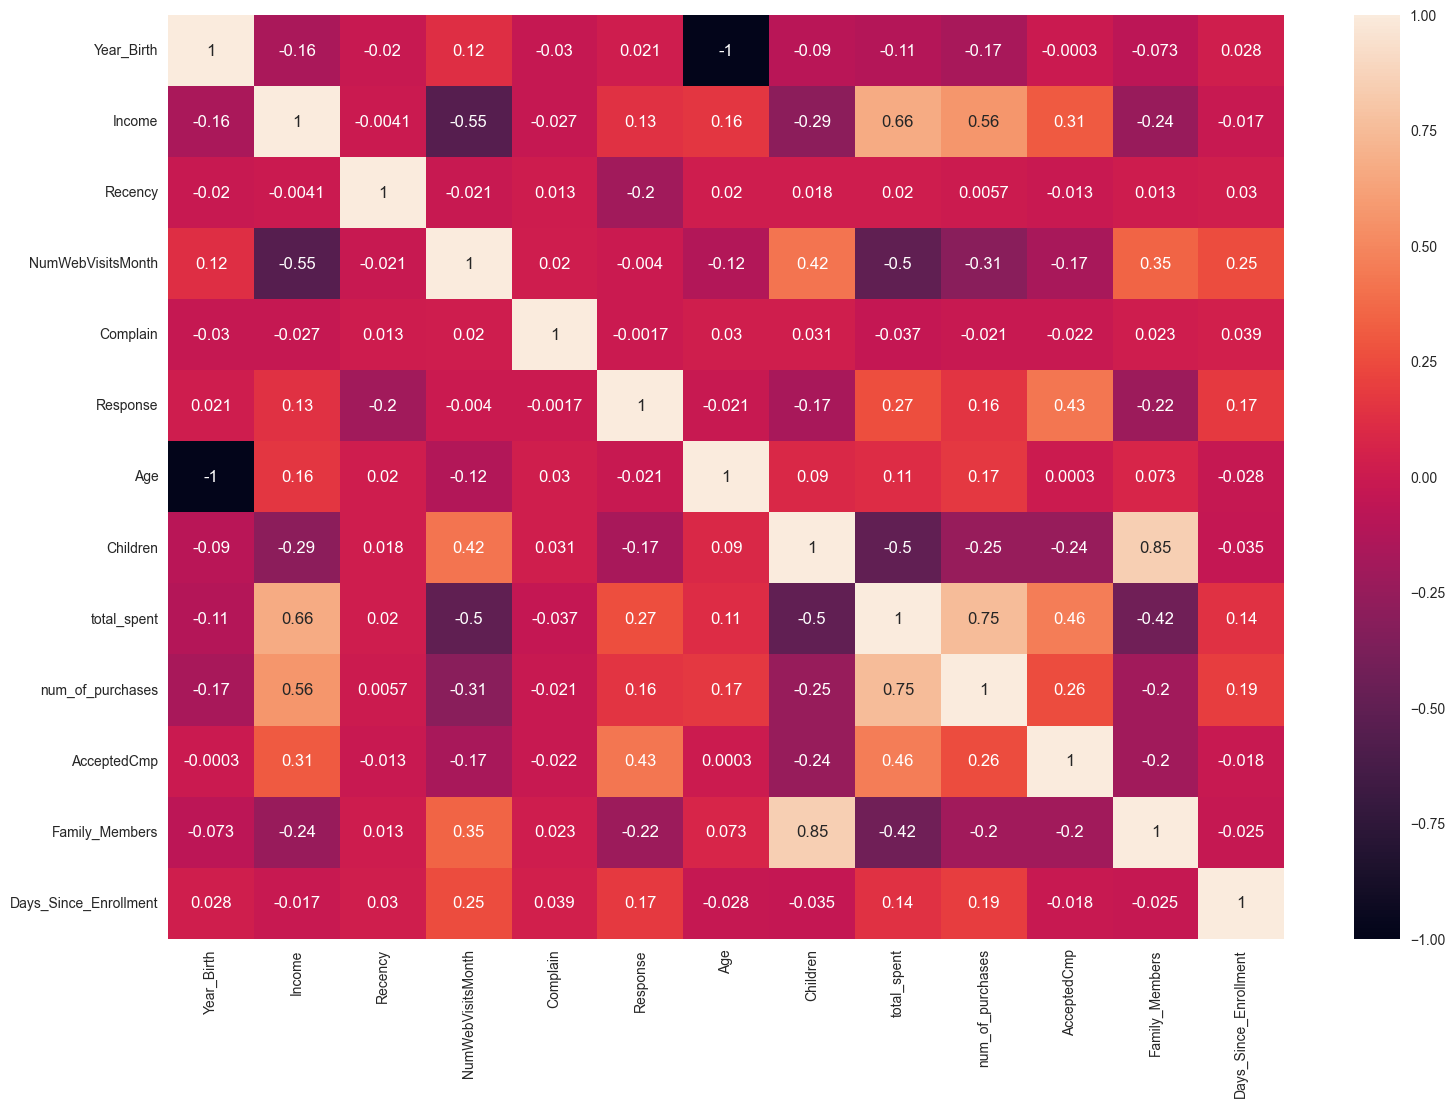

In [39]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [40]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,total_spent,num_of_purchases,AcceptedCmp,Family_Members,Joined_year,Joined_month,Days_Since_Enrollment
0,1957,Graduate,Alone,58138.0,58,7,0,1,66,0,1617,25,0,1,2012,April,972
1,1954,Graduate,Alone,46344.0,38,5,0,0,69,2,27,6,0,3,2014,August,126
2,1965,Graduate,Together,71613.0,26,4,0,0,58,0,776,21,0,2,2013,August,473
3,1984,Graduate,Together,26646.0,26,6,0,0,39,1,53,8,0,3,2014,October,66
4,1981,PostGraduate,Together,58293.0,94,5,0,0,42,1,422,19,0,3,2014,January,322


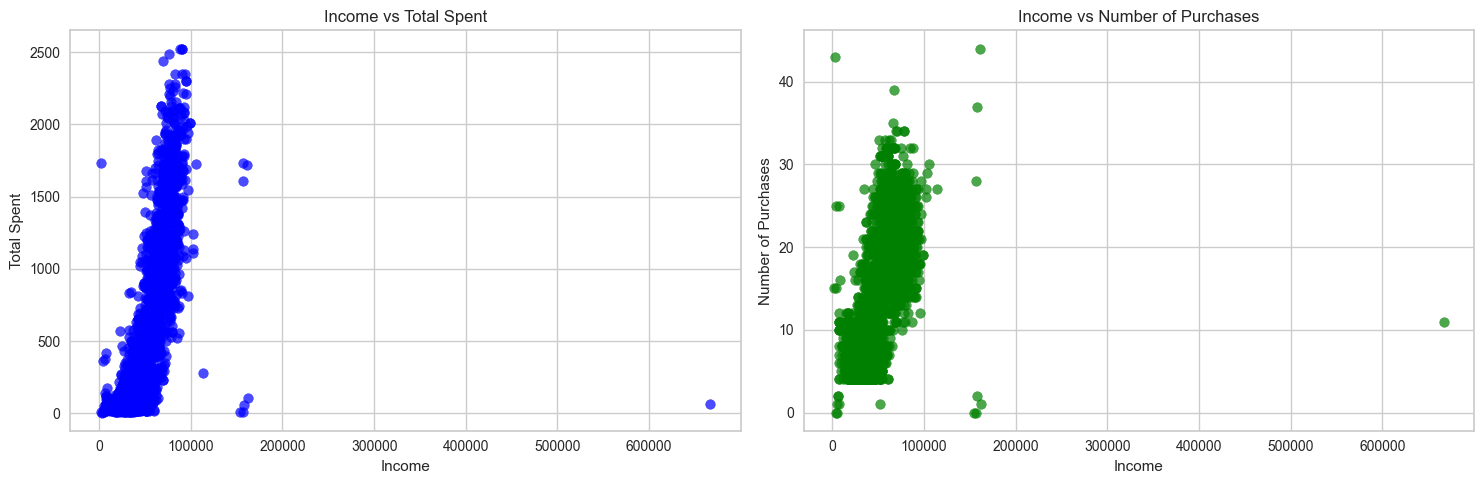

In [41]:
# Create scatter plots for 'Income' vs 'Total_Spent' and 'Income' vs 'Num_of_Purchases'
plt.figure(figsize=(15, 5))

# Scatter plot for 'Income' vs 'Total_Spent'
plt.subplot(121)
plt.scatter(df['Income'], df['total_spent'], c='blue', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Income vs Total Spent')

# Scatter plot for 'Income' vs 'Num_of_Purchases'
plt.subplot(122)
plt.scatter(df['Income'], df['num_of_purchases'], c='green', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Number of Purchases')
plt.title('Income vs Number of Purchases')

plt.tight_layout()
plt.show()

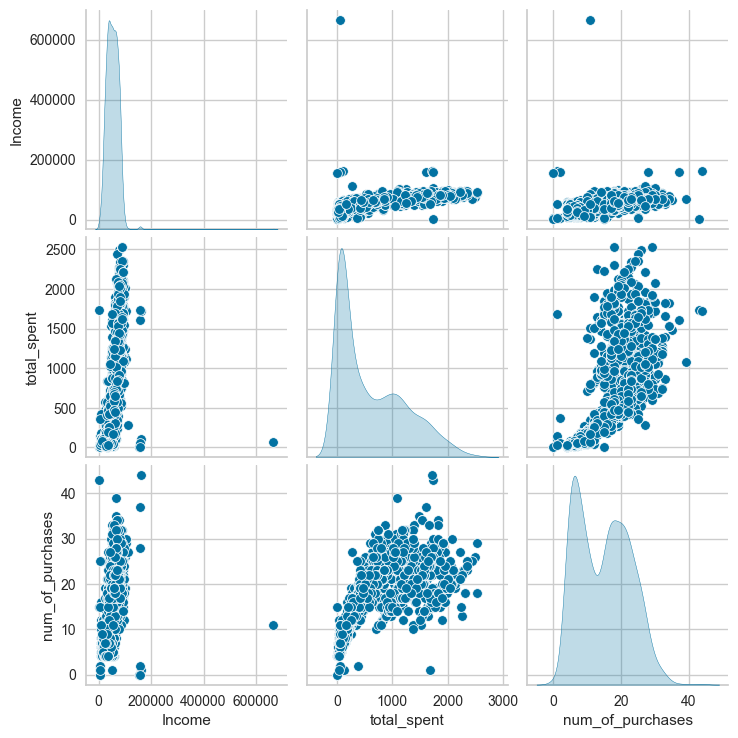

In [42]:
# Create a pairplot for 'Income,' 'Total Spent,' and 'Number of Purchases'
sns.pairplot(df[['Income', 'total_spent', 'num_of_purchases']], diag_kind='kde')
plt.show()

In [43]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,total_spent,num_of_purchases,AcceptedCmp,Family_Members,Joined_year,Joined_month,Days_Since_Enrollment
0,1957,Graduate,Alone,58138.0,58,7,0,1,66,0,1617,25,0,1,2012,April,972
1,1954,Graduate,Alone,46344.0,38,5,0,0,69,2,27,6,0,3,2014,August,126
2,1965,Graduate,Together,71613.0,26,4,0,0,58,0,776,21,0,2,2013,August,473
3,1984,Graduate,Together,26646.0,26,6,0,0,39,1,53,8,0,3,2014,October,66
4,1981,PostGraduate,Together,58293.0,94,5,0,0,42,1,422,19,0,3,2014,January,322


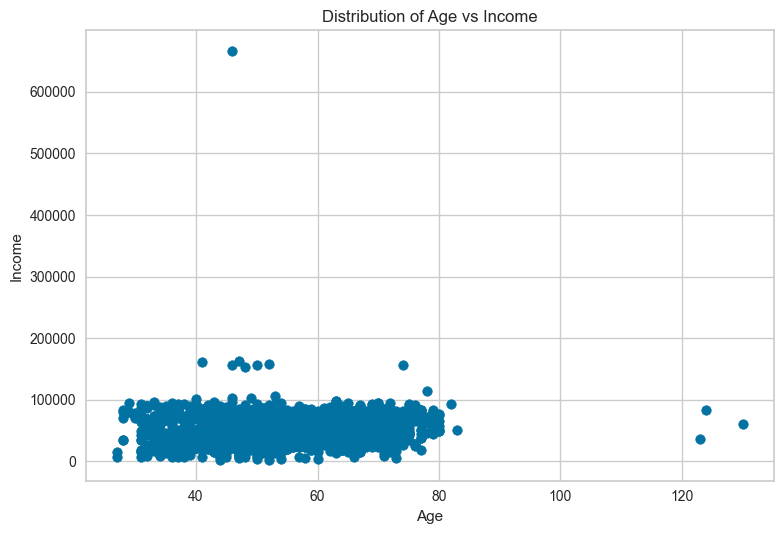

In [44]:
plt.scatter(df['Age'], df["Income"])
plt.title('Distribution of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()


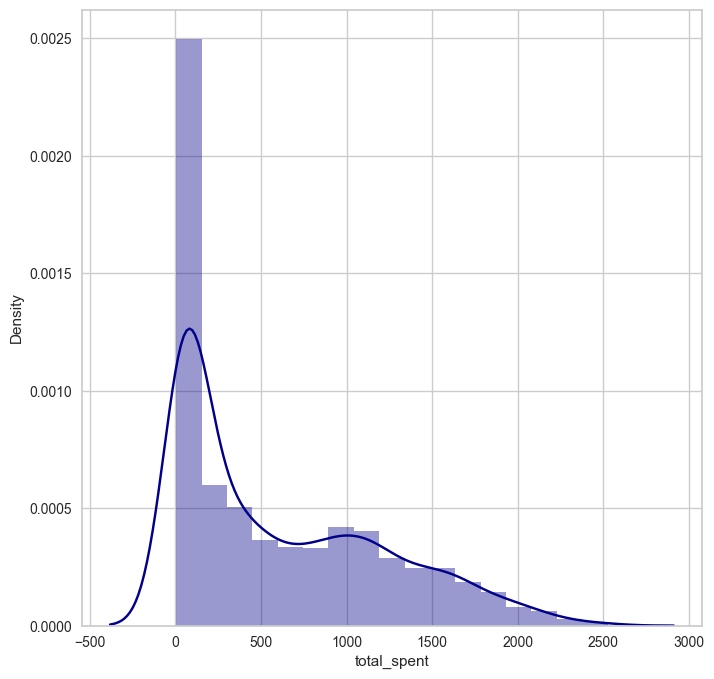

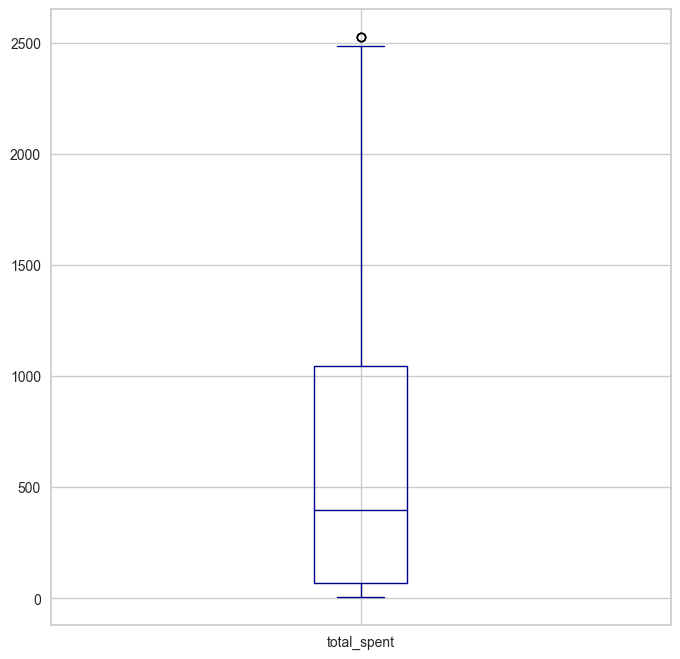

In [45]:
plt.figure(figsize=(8,8))
sns.distplot(df["total_spent"],color = 'darkblue')
plt.show()
df["total_spent"].plot.box(figsize=(8,8),color='darkblue')
plt.show()

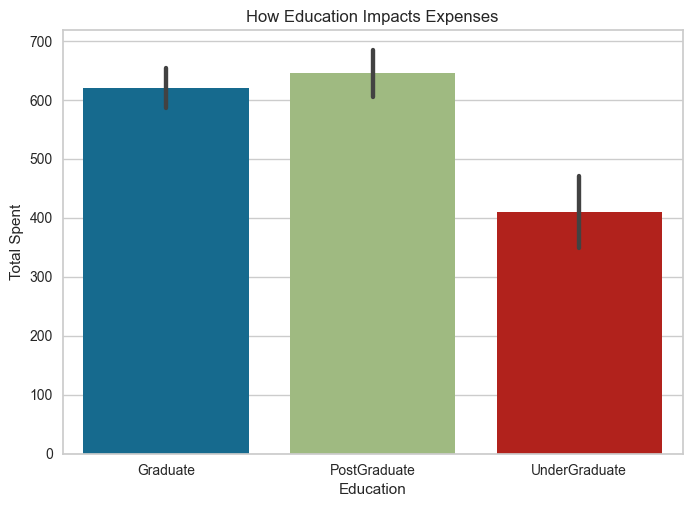

In [46]:
# Create the barplot
sns.barplot(x='Education', y='total_spent', data=df)
plt.title('How Education Impacts Expenses')

# Set the labels for the axes
plt.ylabel('Total Spent')
plt.xlabel('Education')

# Display the plot
plt.show()

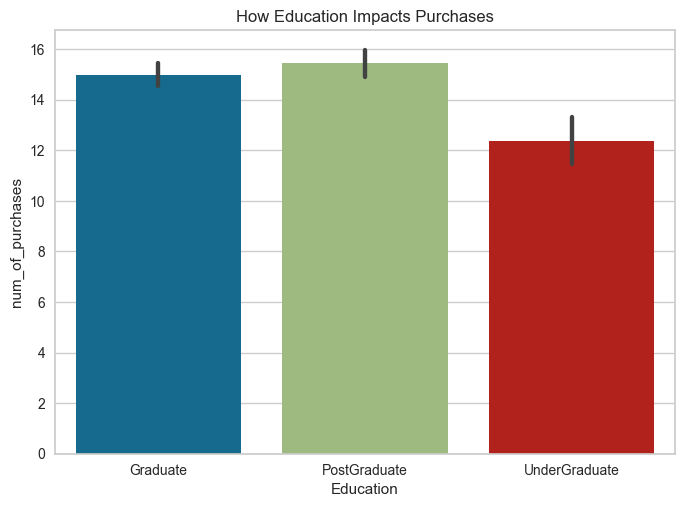

In [47]:
# Create the barplot
sns.barplot(x='Education', y='num_of_purchases', data=df)
plt.title('How Education Impacts Purchases')

# Set the labels for the axes
plt.ylabel('num_of_purchases')
plt.xlabel('Education')

# Display the plot
plt.show()

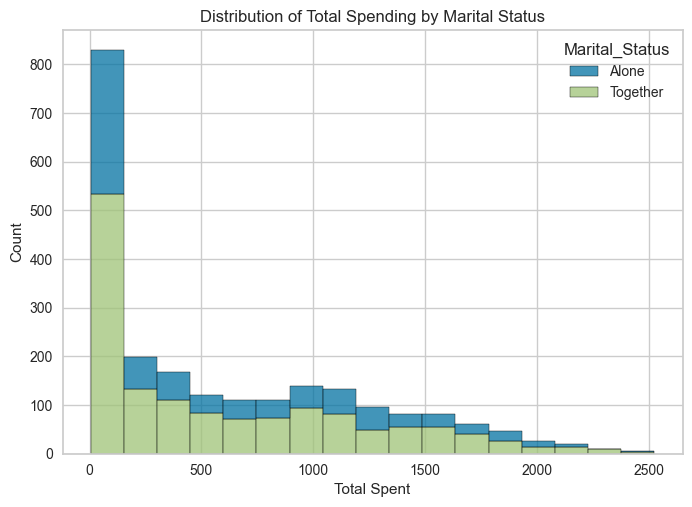

In [48]:
# Create the histogram
sns.histplot(data=df, x='total_spent', hue='Marital_Status', multiple='stack')

# Set the title and labels
plt.title('Distribution of Total Spending by Marital Status')
plt.xlabel('Total Spent')
plt.ylabel('Count')

# Display the plot
plt.show()

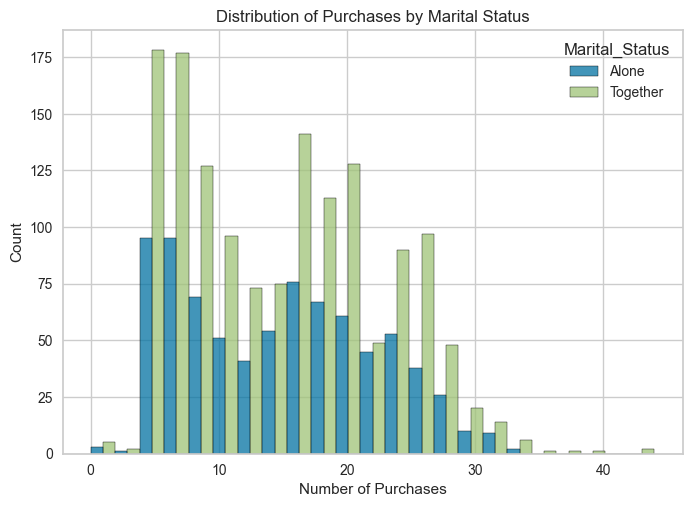

In [49]:
# Create the histogram
sns.histplot(data=df, x='num_of_purchases', hue='Marital_Status', multiple='dodge')

# Set the title and labels
plt.title('Distribution of Purchases by Marital Status')
plt.xlabel('Number of Purchases')
plt.ylabel('Count')

# Display the plot
plt.show()

In [50]:
def find_outliers_iqr(df):
    outlier_info = {}
    for column in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = {
            'num_outliers': outliers.shape[0],
            'min_range': lower_bound,
            'max_range': upper_bound
        }

    return outlier_info

# Use the function on your DataFrame
outliers = find_outliers_iqr(df)

# Print the outlier info
for column, info in outliers.items():
    print(f"Column: {column}")
    print(f"  Number of Outliers: {info['num_outliers']}")
    print(f"  Outlier Range: <{info['min_range']:.2f}, >{info['max_range']:.2f}")
    print()

find_outliers_iqr(df)

Column: Year_Birth
  Number of Outliers: 3
  Outlier Range: <1932.00, >2004.00

Column: Income
  Number of Outliers: 8
  Outlier Range: <-13587.75, >117416.25

Column: Recency
  Number of Outliers: 0
  Outlier Range: <-51.00, >149.00

Column: NumWebVisitsMonth
  Number of Outliers: 8
  Outlier Range: <-3.00, >13.00

Column: Complain
  Number of Outliers: 21
  Outlier Range: <0.00, >0.00

Column: Response
  Number of Outliers: 334
  Outlier Range: <0.00, >0.00

Column: Children
  Number of Outliers: 53
  Outlier Range: <-1.50, >2.50

Column: total_spent
  Number of Outliers: 3
  Outlier Range: <-1396.38, >2510.62

Column: num_of_purchases
  Number of Outliers: 2
  Outlier Range: <-11.50, >40.50

Column: AcceptedCmp
  Number of Outliers: 463
  Outlier Range: <0.00, >0.00

Column: Family_Members
  Number of Outliers: 32
  Outlier Range: <0.50, >4.50

Column: Days_Since_Enrollment
  Number of Outliers: 0
  Outlier Range: <-175.00, >1203.00



{'Year_Birth': {'num_outliers': 3, 'min_range': 1932.0, 'max_range': 2004.0},
 'Income': {'num_outliers': 8, 'min_range': -13587.75, 'max_range': 117416.25},
 'Recency': {'num_outliers': 0, 'min_range': -51.0, 'max_range': 149.0},
 'NumWebVisitsMonth': {'num_outliers': 8,
  'min_range': -3.0,
  'max_range': 13.0},
 'Complain': {'num_outliers': 21, 'min_range': 0.0, 'max_range': 0.0},
 'Response': {'num_outliers': 334, 'min_range': 0.0, 'max_range': 0.0},
 'Children': {'num_outliers': 53, 'min_range': -1.5, 'max_range': 2.5},
 'total_spent': {'num_outliers': 3,
  'min_range': -1396.375,
  'max_range': 2510.625},
 'num_of_purchases': {'num_outliers': 2,
  'min_range': -11.5,
  'max_range': 40.5},
 'AcceptedCmp': {'num_outliers': 463, 'min_range': 0.0, 'max_range': 0.0},
 'Family_Members': {'num_outliers': 32, 'min_range': 0.5, 'max_range': 4.5},
 'Days_Since_Enrollment': {'num_outliers': 0,
  'min_range': -175.0,
  'max_range': 1203.0}}

<AxesSubplot:xlabel='num_of_purchases', ylabel='Density'>

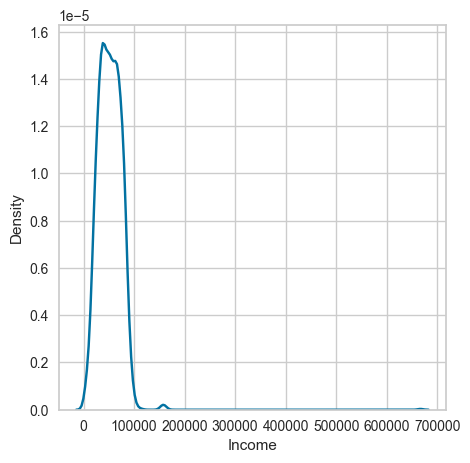

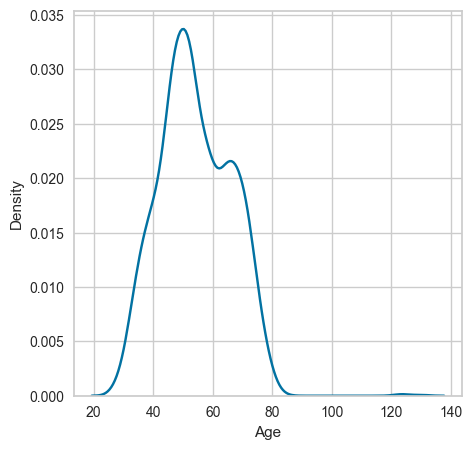

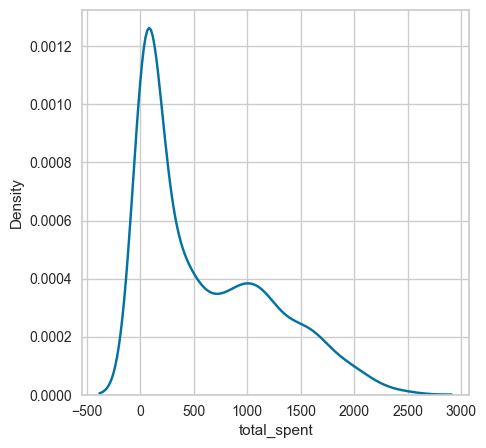

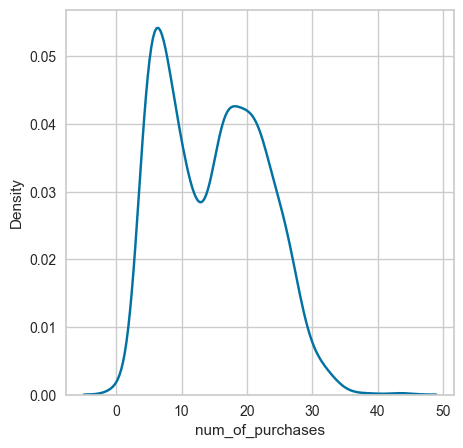

In [51]:
#Treating Outliers

plt.figure(figsize=(5,5))
sns.kdeplot(df['Income'])

plt.figure(figsize=(5,5))
sns.kdeplot(df['Age'])

plt.figure(figsize=(5,5))
sns.kdeplot(df['total_spent'])

plt.figure(figsize=(5,5))
sns.kdeplot(df['num_of_purchases'])




In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
NumWebVisitsMonth,2240.0,5.316518,2.426645,0.0,3.00,6.0,7.00,20.0
Complain,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0
Response,2240.0,0.149107,0.356274,0.0,0.00,0.0,0.00,1.0
Age,2240.0,54.194196,11.984069,27.0,46.00,53.0,64.00,130.0
Children,2240.0,0.950446,0.751803,0.0,0.00,1.0,1.00,3.0
total_spent,2240.0,605.798214,602.249288,5.0,68.75,396.0,1045.50,2525.0
num_of_purchases,2240.0,14.862054,7.677173,0.0,8.00,15.0,21.00,44.0


In [53]:
def cap_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Adjust lower bound for columns that shouldn't have negative values
        if column in ['Income', 'total_spent', 'num_of_purchases']:
            lower_bound = max(lower_bound, 0)

        # Print the calculated bounds for diagnostics
        print(f"Column: {column}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

        # Cap the values for each column individually
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound, axis=0)

# Columns to apply the outlier capping
columns_to_cap = ['Income', 'Age', 'total_spent', 'num_of_purchases']

# Apply the function to your DataFrame
cap_outliers(df, columns_to_cap)


Column: Income, Lower Bound: 0, Upper Bound: 117416.25
Column: Age, Lower Bound: 19.0, Upper Bound: 91.0
Column: total_spent, Lower Bound: 0, Upper Bound: 2510.625
Column: num_of_purchases, Lower Bound: 0, Upper Bound: 40.5


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.000
Income,2240.0,51865.874554,20936.104821,1730.0,35538.75,51381.5,68289.75,117416.250
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.000
NumWebVisitsMonth,2240.0,5.316518,2.426645,0.0,3.00,6.0,7.00,20.000
Complain,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.000
Response,2240.0,0.149107,0.356274,0.0,0.00,0.0,0.00,1.000
Age,2240.0,54.147768,11.771725,27.0,46.00,53.0,64.00,91.000
Children,2240.0,0.950446,0.751803,0.0,0.00,1.0,1.00,3.000
total_spent,2240.0,605.779408,602.189559,5.0,68.75,396.0,1045.50,2510.625
num_of_purchases,2240.0,14.859375,7.667679,0.0,8.00,15.0,21.00,40.500


In [55]:
df['Education'].value_counts()

Graduate         1127
PostGraduate      856
UnderGraduate     257
Name: Education, dtype: int64

In [56]:
# For the OrdinalEncoder, we need to define the order of the categories
education_order = ['UnderGraduate', 'Graduate', 'PostGraduate']


# Create the OrdinalEncoder and OneHotEncoder
ord_encoder = OrdinalEncoder(categories=[education_order])
one_hot_encoder = OneHotEncoder(sparse=False)

# Ordinal encoding for 'Education', 'Joined', and 'Month'
df[['Education']] = ord_encoder.fit_transform(df[['Education']])

# One-hot encoding for 'Marital_Status'
marital_status_encoded = one_hot_encoder.fit_transform(df[['Marital_Status']])
marital_status_encoded_df = pd.DataFrame(marital_status_encoded, 
                                         columns=one_hot_encoder.get_feature_names_out(['Marital_Status']))

# Drop original 'Marital_Status' column and concat the new one-hot encoded columns
df = df.drop('Marital_Status', axis=1)
df = pd.concat([df, marital_status_encoded_df], axis=1)


In [57]:
df[['Education','Marital_Status_Alone','Marital_Status_Together']].head()

,Education,Marital_Status_Alone,Marital_Status_Together
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,2.0,0.0,1.0


In [58]:
# Mapping dictionary for full month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping to the 'Joined_month' column
df['Joined_month'] = df['Joined_month'].map(month_mapping)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Education                2240 non-null   float64
 2   Income                   2240 non-null   float64
 3   Recency                  2240 non-null   int64  
 4   NumWebVisitsMonth        2240 non-null   int64  
 5   Complain                 2240 non-null   int64  
 6   Response                 2240 non-null   int64  
 7   Age                      2240 non-null   float64
 8   Children                 2240 non-null   int64  
 9   total_spent              2240 non-null   float64
 10  num_of_purchases         2240 non-null   float64
 11  AcceptedCmp              2240 non-null   int64  
 12  Family_Members           2240 non-null   int64  
 13  Joined_year              2240 non-null   object 
 14  Joined_month            

In [60]:
pca

NameError: name 'pca' is not defined

In [61]:

# Apply StandardScaler to the numeric columns
scaler = StandardScaler()
scaled= scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled,columns= df.columns )


In [62]:
scaled_df.shape

(2240, 18)

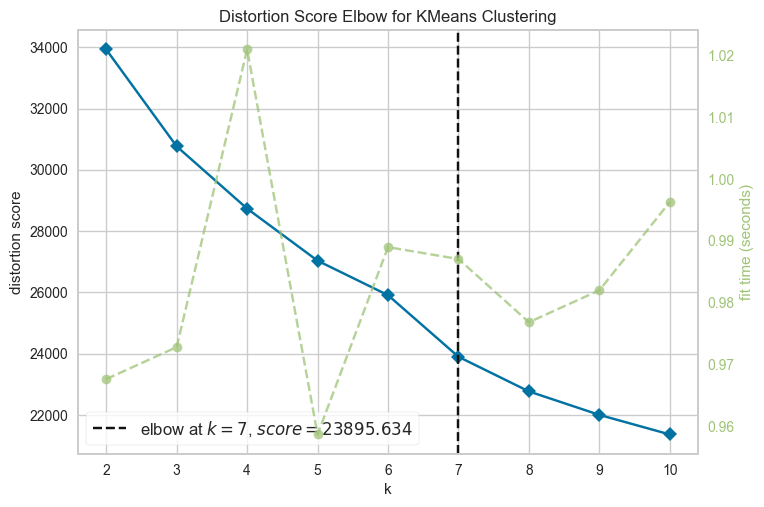

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()

In [64]:
from sklearn.metrics import silhouette_score
# Fit KMeans with the optimal number of clusters found by KElbowVisualizer
optimal_clusters = visualizer.elbow_value_  # Get the optimal number of clusters

kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++')
kmeans_optimal.fit(scaled_df)

# Calculate silhouette score
labels = kmeans_optimal.labels_
silhouette_avg = silhouette_score(scaled_df, labels)

print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}")

Silhouette Score for 7 clusters: 0.1302302584589153


In [ ]:
df.columns

In [65]:
# Perform KMeans clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=0)
clusters = kmeans.fit_predict(scaled_df)

# # Add the cluster labels to your PCA-transformed DataFrame
# PCA_df['label'] = clusters

scaled_df["Cluster"]= clusters



In [66]:
scaled_df['Cluster'].value_counts()

5    489
2    449
1    412
4    401
3    326
0    142
6     21
Name: Cluster, dtype: int64

In [67]:
scaled_df.head()

,Year_Birth,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,total_spent,num_of_purchases,AcceptedCmp,Family_Members,Joined_year,Joined_month,Days_Since_Enrollment,Marital_Status_Alone,Marital_Status_Together,Cluster
0,-0.985345,-0.410013,0.299651,0.307039,0.693904,-0.097282,2.388846,1.007064,-1.264505,1.679615,1.322811,-0.439037,-1.759115,-1.502225,-0.717583,1.976745,1.346874,-1.346874,3
1,-1.235733,-0.410013,-0.263808,-0.383664,-0.130463,-0.097282,-0.418612,1.261969,1.396361,-0.961340,-1.155676,-0.439037,0.446548,1.420036,0.421397,-1.667011,1.346874,-1.346874,4
2,-0.317643,-0.410013,0.943420,-0.798086,-0.542647,-0.097282,-0.418612,0.327318,-1.264505,0.282733,0.801024,-0.439037,-0.656283,-0.041094,0.421397,-0.172468,-0.742460,0.742460,5
3,1.268149,-0.410013,-1.204881,-0.798086,0.281720,-0.097282,-0.418612,-1.287080,0.065928,-0.918154,-0.894783,-0.439037,0.446548,1.420036,0.990888,-1.925433,-0.742460,0.742460,2
4,1.017761,1.123256,0.307056,1.550305,-0.130463,-0.097282,-0.418612,-1.032175,0.065928,-0.305253,0.540131,-0.439037,0.446548,1.420036,-1.571819,-0.822831,-0.742460,0.742460,1


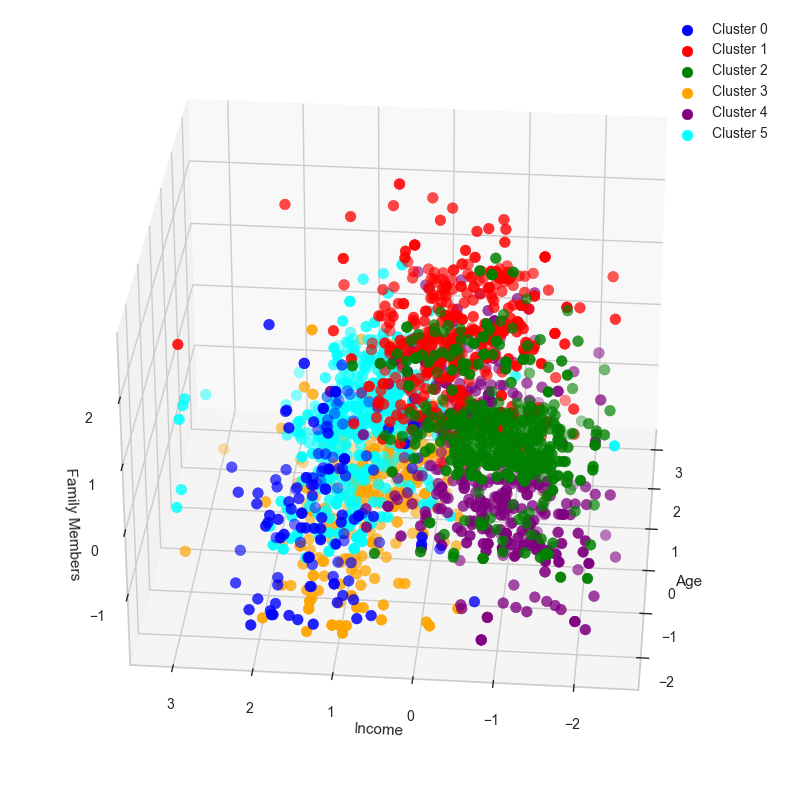

In [68]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(21, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plots for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']  # Adjust as per the number of clusters
for i in range(6):  # Assuming 7 clusters
    cluster_data = scaled_df[scaled_df['Cluster'] == i]
    ax.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Family_Members'], 
               c=colors[i], s=60, label=f'Cluster {i}')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Family Members')

# Legend
ax.legend()

# Initial view
ax.view_init(30, 185)

plt.show()

In [ ]:
# # Assuming PCA_df is your PCA-transformed DataFrame and we're using the first two components

# # Apply Agglomerative Clustering
# agg_clustering = AgglomerativeClustering(n_clusters=6)
# agg_clusters = agg_clustering.fit_predict(scaled_df)  # Using the first two components

# # Add the Agglomerative cluster labels to the PCA DataFrame
# # PCA_df['agg_label'] = agg_clusters

# # Add the Agglomerative cluster labels to the PCA DataFrame
# scaled_df['agg_label'] = agg_clusters




In [ ]:
# # Create a 3D scatter plot
# fig = plt.figure(figsize=(21, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plots for each cluster
# colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']  # Adjust as per the number of clusters
# for i in range(6):  # Assuming 6 clusters
#     cluster_data = scaled_df[scaled_df['agg_label'] == i]
#     ax.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Family_Members'], 
#                c=colors[i], s=60, label=f'Cluster {i}')

# # Set labels
# ax.set_xlabel('Age')
# ax.set_ylabel('Income')
# ax.set_zlabel('Family Members')

# # Legend
# ax.legend()

# # Initial view
# ax.view_init(30, 185)

# plt.show()

In [ ]:
#After PCA

In [69]:
# Perform PCA to retain 80% of the variance
pca = PCA(n_components=0.80)
pca.fit(scaled_df)

# Transform the scaled data
PCA_df = pd.DataFrame(pca.transform(scaled_df))

# Calculate the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_percent = explained_variance_ratio * 100  # convert to percentage

# Display the explained variance for each component
for i, variance in enumerate(explained_variance_ratio_percent):
    print(f"Principal Component {i+1}: {variance:.2f}% of the total variance")

# Total variance explained by the selected components
total_variance = sum(explained_variance_ratio_percent)
print(f"\nTotal Variance Explained by the selected components: {total_variance:.2f}%")

# Number of components selected
print(f"Number of components selected: {pca.n_components_}")

# silhouette score
print(silhouette_score(PCA_df, model.labels_, metric='euclidean'))

Principal Component 1: 20.35% of the total variance
Principal Component 2: 14.18% of the total variance
Principal Component 3: 11.68% of the total variance
Principal Component 4: 10.59% of the total variance
Principal Component 5: 9.34% of the total variance
Principal Component 6: 5.42% of the total variance
Principal Component 7: 5.31% of the total variance
Principal Component 8: 4.95% of the total variance

Total Variance Explained by the selected components: 81.82%
Number of components selected: 8
0.15953768109268904


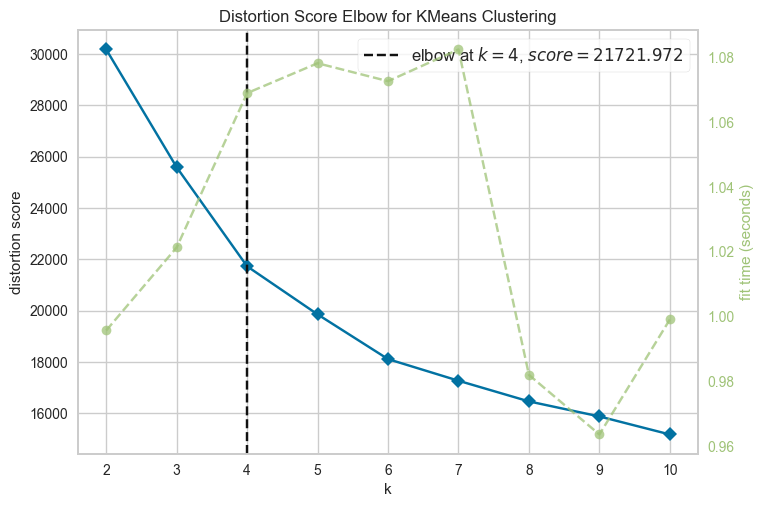

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
model = KMeans()
visualizer_pca = KElbowVisualizer(model, k=10)
visualizer_pca.fit(PCA_df)       r
visualizer_pca.show()

In [71]:
# Fit KMeans with the optimal number of clusters found by KElbowVisualizer
optimal_clusters_pca = visualizer_pca.elbow_value_  # Get the optimal number of clusters

kmeans_optimal = KMeans(n_clusters=optimal_clusters_pca, init='k-means++')
kmeans_optimal.fit(PCA_df)

# Calculate silhouette score
labels = kmeans_optimal.labels_
silhouette_avg = silhouette_score(PCA_df, labels)

print(f"Silhouette Score for {optimal_clusters_pca} clusters: {silhouette_avg}")

Silhouette Score for 4 clusters: 0.27670911823705313


In [72]:
# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(PCA_df)

# # Add the cluster labels to your PCA-transformed DataFrame
PCA_df['label'] = clusters

scaled_df["pca_Cluster"]= clusters



In [73]:
scaled_df["pca_Cluster"].value_counts()

0    858
1    729
3    504
2    149
Name: pca_Cluster, dtype: int64

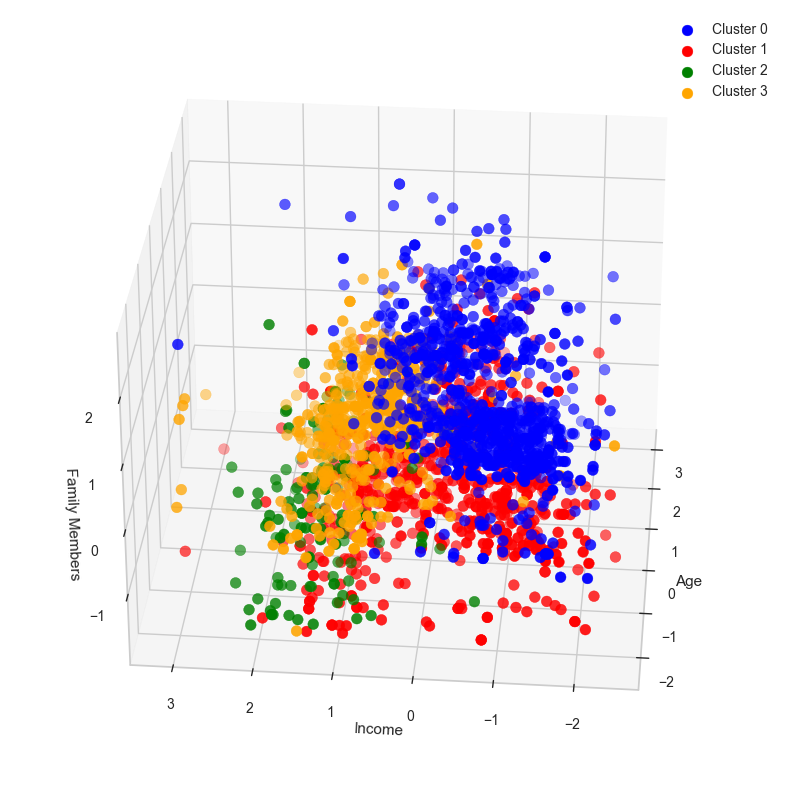

In [74]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(21, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plots for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']  # Adjust as per the number of clusters
for i in range(4):  # Assuming 4clusters
    cluster_data = scaled_df[scaled_df['pca_Cluster'] == i]
    ax.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Family_Members'], 
               c=colors[i], s=60, label=f'Cluster {i}')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Family Members')

# Legend
ax.legend()

# Initial view
ax.view_init(30, 185)

plt.show()

In [ ]:


# # Assuming PCA_df is your PCA-transformed DataFrame and we're using the first two components

# # Apply Agglomerative Clustering
# agg_clustering = AgglomerativeClustering(n_clusters=4)
# agg_clusters = agg_clustering.fit_predict(PCA_df)  # Using the first two components

# # Add the Agglomerative cluster labels to the PCA DataFrame
# PCA_df['agg_label'] = agg_clusters

# # Add the Agglomerative cluster labels to the PCA DataFrame
# scaled_df['pca_agg_label'] = agg_clusters




In [ ]:
# # Create a 3D scatter plot
# fig = plt.figure(figsize=(21, 10))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plots for each cluster
# colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']  # Adjust as per the number of clusters
# for i in range(4):  # Assuming 6 clusters
#     cluster_data = scaled_df[scaled_df['pca_agg_label'] == i]
#     ax.scatter(cluster_data['Age'], cluster_data['Income'], cluster_data['Family_Members'], 
#                c=colors[i], s=60, label=f'Cluster {i}')

# # Set labels
# ax.set_xlabel('Age')
# ax.set_ylabel('Income')
# ax.set_zlabel('Family Members')

# # Legend
# ax.legend()

# # Initial view
# ax.view_init(30, 185)

# plt.show()

In [75]:
original_df=df.copy()

# Check that both dataframes have the same number of rows
if len(PCA_df) == len(original_df):
    # Assign cluster labels from PCA_df to original_df
    original_df['Cluster_Label'] = PCA_df['label']
else:
    print("The number of rows in PCA_df and original_df does not match.")

In [76]:
original_df.head()

,Year_Birth,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,total_spent,num_of_purchases,AcceptedCmp,Family_Members,Joined_year,Joined_month,Days_Since_Enrollment,Marital_Status_Alone,Marital_Status_Together,Cluster_Label
0,1957,1.0,58138.0,58,7,0,1,66.0,0,1617.0,25.0,0,1,2012,4,972,1.0,0.0,1
1,1954,1.0,46344.0,38,5,0,0,69.0,2,27.0,6.0,0,3,2014,8,126,1.0,0.0,1
2,1965,1.0,71613.0,26,4,0,0,58.0,0,776.0,21.0,0,2,2013,8,473,0.0,1.0,3
3,1984,1.0,26646.0,26,6,0,0,39.0,1,53.0,8.0,0,3,2014,10,66,0.0,1.0,0
4,1981,2.0,58293.0,94,5,0,0,42.0,1,422.0,19.0,0,3,2014,1,322,0.0,1.0,0


In [77]:
 original_df['Cluster_Label'].value_counts()

0    858
1    729
3    504
2    149
Name: Cluster_Label, dtype: int64

In [ ]:
original_df.columns

In [ ]:
original_df.

In [ ]:
# Save DataFrame as a CSV file
original_df.to_csv('Dataframe_Clusters.csv', index=False)

In [81]:
# Focusing on the specified columns for cluster analysis
selected_columns = [
    'Year_Birth', 'Education', 'Income', 'Age', 'Family_Members', 
    'Marital_Status_Alone', 'Marital_Status_Together', 
    'num_of_purchases', 'total_spent', 'Cluster_Label'
]

# Filtering the dataframe to include only the selected columns
filtered_data = original_df[selected_columns]

# Analyzing the characteristics of each cluster for the selected columns
cluster_analysis_selected = filtered_data.groupby('Cluster_Label').agg(['min','max','mean', 'median', 'std', 'count'])

# Displaying the analysis for each cluster
cluster_analysis_selected.transpose()


Cluster_Label                               0              1              2  \
Year_Birth              min       1946.000000    1893.000000    1946.000000   
                        max       1996.000000    1995.000000    1994.000000   
                        mean      1970.235431    1968.333333    1973.342282   
                        median    1972.000000    1969.000000    1975.000000   
                        std         11.068707      12.358207      12.855103   
                        count      858.000000     729.000000     149.000000   
Education               min          0.000000       0.000000       0.000000   
                        max          2.000000       2.000000       2.000000   
                        mean         1.247086       1.263374       1.389262   
                        median       1.000000       1.000000       1.000000   
                        std          0.682860       0.641333       0.600804   
                        count      858.000000     729.000000     149.000000   
Income                  min       4023.000000    1730.000000   37929.000000   
                        max     117416.250000  117416.250000  105471.000000   
                        mean     38945.187354   49587.837791   79619.922819   
                        median   38360.500000   48918.000000   81205.000000   
                        std      14371.661798   19975.738712   12044.300224   
                        count      858.000000     729.000000     149.000000   
Age                     min         27.000000      28.000000      29.000000   
                        max         77.000000      91.000000      77.000000   
                        mean        52.764569      54.569273      49.657718   
                        median      51.000000      54.000000      48.000000   
                        std         11.068707      11.921950      12.855103   
                        count      858.000000     729.000000     149.000000   
Family_Members          min          2.000000       1.000000       1.000000   
                        max          5.000000       4.000000       4.000000   
                        mean         3.282051       1.962963       1.805369   
                        median       3.000000       2.000000       2.000000   
                        std          0.679542       0.744946       0.722962   
                        count      858.000000     729.000000     149.000000   
Marital_Status_Alone    min          0.000000       1.000000       0.000000   
                        max          1.000000       1.000000       1.000000   
                        mean         0.004662       1.000000       0.409396   
                        median       0.000000       1.000000       0.000000   
                        std          0.068159       0.000000       0.493381   
                        count      858.000000     729.000000     149.000000   
Marital_Status_Together min          0.000000       0.000000       0.000000   
                        max          1.000000       0.000000       1.000000   
                        mean         0.995338       0.000000       0.590604   
                        median       1.000000       0.000000       1.000000   
                        std          0.068159       0.000000       0.493381   
                        count      858.000000     729.000000     149.000000   
num_of_purchases        min          1.000000       0.000000      12.000000   
                        max         33.000000      33.000000      34.000000   
                        mean        10.355478      14.318244      21.087248   
                        median       9.000000      14.000000      21.000000   
                        std          5.632521       7.478372       4.357244   
                        count      858.000000     729.000000     149.000000   
total_spent             min          8.000000       5.000000     265.000000   
                        max       1616.000000    2